In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import data1 as data
import math

### Read data & format

In [2]:
df_extrafull = pd.read_csv('extra_full_performance.csv')
df_extra_average = pd.read_csv('extra_average_performance.csv')
df_inter_average = pd.read_csv('inter_average_performance.csv')
df_interfull = pd.read_csv('inter_full_performance.csv')

In [3]:
df_extrafull['mean_train_error'] = 1-df_extrafull['mean_train_accuracy']
df_extrafull['std_train_error'] = df_extrafull['std_train_accuracy']
df_extrafull['mean_test_error'] = 1-df_extrafull['mean_test_accuracy']
df_extrafull['std_test_error'] = df_extrafull['std_test_accuracy']

In [4]:
df_extrafull.set_index('Unnamed: 0', inplace=True)
df_extrafull.index.name = None
df_extra_average.set_index('Unnamed: 0', inplace=True)
df_extra_average.index.name = None
df_inter_average.set_index('Unnamed: 0', inplace=True)
df_inter_average.index.name = None
df_interfull.set_index('Unnamed: 0', inplace=True)
df_interfull.index.name = None

In [5]:
def plot_summary(metric, summ, num_reps=30, baseline=None, names=None, colors = list(mcolors.BASE_COLORS.keys())):
    width = 0.35
    ind = np.arange(len(summ))
    plt.bar(ind-width/2, summ[f'mean_train_{metric}'], width=width, label='train', 
            yerr=summ[f'std_train_{metric}']/num_reps**0.5, capsize=3.0)
    plt.bar(ind+width/2, summ[f'mean_test_{metric}'], width=width, label='test',
            yerr=summ[f'std_test_{metric}']/num_reps**0.5, capsize=3.0)
    if baseline:
        for i in range(len(baseline)):
            plt.axhline(y=baseline[i], color=colors[i], linestyle='-', label=names[i])
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(ind, summ.index)

### Data Overview

In [6]:
df_extrafull # full phase extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.383107,0.022709,0.400911,0.400362,2.907224,0.018351,3.477735,2.683668,0.616893,0.022709,0.599089,0.400362
RF,0.999476,0.000929,0.665978,0.392974,0.241109,0.005626,2.591146,3.969736,0.000524,0.000929,0.334022,0.392974
Rufit,0.957413,0.006143,0.560884,0.413363,0.371222,0.011933,2.925191,2.931685,0.042587,0.006143,0.439116,0.413363
GAM,0.641656,0.479840,0.538279,0.411800,0.886580,0.649313,0.629749,0.321377,0.358344,0.479840,0.461721,0.411800


In [7]:
df_extra_average # average phases extrapolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713518,0.009357,0.720996,0.330825,0.503784,0.007100,0.602646,0.640978,0.286482,0.009357,0.279004,0.330825
RF,1.000000,0.000000,0.835364,0.231343,0.044376,0.001762,0.544809,1.464313,0.000000,0.000000,0.164636,0.231343
Rufit,0.989359,0.002850,0.822851,0.244870,0.058853,0.003326,0.524908,0.705184,0.010641,0.002850,0.177149,0.244870
GAM,0.887002,0.292160,0.838275,0.248427,0.221645,0.249120,0.157437,0.131517,0.112998,0.292160,0.161725,0.248427


In [8]:
df_interfull # full phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.382689,0.011744,0.378509,0.149020,2.908712,0.011742,2.929920,0.345263,0.617311,0.011744,0.621491,0.149020
RF,0.999185,0.001356,0.809035,0.057175,0.246824,0.004042,1.005908,0.519007,0.000815,0.001356,0.190965,0.057175
Rufit,0.956312,0.007063,0.800614,0.084637,0.376371,0.012553,1.011095,0.438260,0.043688,0.007063,0.199386,0.084637
GAM,0.642335,0.479694,0.581140,0.494128,0.893636,0.652047,0.892554,0.661810,0.357665,0.479694,0.418860,0.494128


In [9]:
df_inter_average # average phase interpolation

,mean_train_accuracy,std_train_accuracy,mean_test_accuracy,std_test_accuracy,mean_train_log loss,std_train_log loss,mean_test_log loss,std_test_log loss,mean_train_error,std_train_error,mean_test_error,std_test_error
LR,0.713376,0.004852,0.712434,0.095129,0.504037,0.003005,0.507281,0.086280,0.286624,0.004852,0.287566,0.095129
RF,1.000000,0.000000,0.933728,0.052051,0.044982,0.001479,0.198928,0.221424,0.000000,0.000000,0.066272,0.052051
Rufit,0.989370,0.002744,0.930241,0.048868,0.059503,0.003065,0.187712,0.122474,0.010630,0.002744,0.069759,0.048868
GAM,0.887055,0.292179,0.865132,0.301677,0.223409,0.249875,0.223139,0.241809,0.112945,0.292179,0.134868,0.301677


### Calculate the base line
__Notice__:
We think only for the uninformed baseline, interpolation and extrapolation are the same.

1. Informed baseline: 
    * based on the most frequent observations
2. Uninformed baseline: 
    * uninform guessing

__Interpolation Error baseline__
1. Informed full sphase:
    $$ E_{error} = \sum_{i=1}^{n} p(y \neq y_i)
    $$
where $y$ is the most frequency full sphase in all data, $n$ is the sample size
2. Informed average sphase:
$$ E_{error} = \sum_{i=1}^{n} \sum_{j \in \{s,w,v,o\}} p(y_j \neq y_{ji})
    $$
where $y_j$ is the most frequency $j$ sphase in all data, $n$ is the sample size

In [10]:
# interpolation full sphase
uniq, cnts = np.unique(data.y.values, return_counts=True, axis=0)
inter_full_info_error = 1 - max(cnts)/sum(cnts)
inter_full_uinfo_error = 1 - (1/2)**4
print('Interpolation full sphase error base line:\nInform error:{} \nUninform error:{}'.format(inter_full_info_error, inter_full_uinfo_error))


Interpolation full sphase error base line:
Inform error:0.5912162162162162 
Uninform error:0.9375


In [11]:
# interpolation average
inter_avg_info_error = []
for each in [data.sphere, data.vesicle, data.worm, data.other]:
    uniq, cnt = np.unique(each, return_counts=True)
    prob = 1-max(cnt)/sum(cnt)
    inter_avg_info_error.append((1-prob))

inter_avg_uninfo_error = [0.5, 0.5, 0.5, 0.5]

inter_avg_info_error = np.mean(inter_avg_info_error)
inter_avg_uninfo_error = np.mean([0.5, 0.5, 0.5, 0.5])
print('Interpolation average sphases error base line:\nInform error:{} \nUninform error:{}'.format(inter_avg_info_error, inter_avg_uninfo_error))


Interpolation average sphases error base line:
Inform error:0.7204391891891893 
Uninform error:0.5


__Extrapolation Error baseline__
1. Full sphase Informed: 
    
    $$ E_{error} = \sum_{k=1}^k \sum_{i=1}^{n_k} p(K=k)p(y_k \neq y_i|K=k)
    $$
    where $k$ is class number, $y_k$ is the most frequency full sphase in $K=k$ class, $n_k$ is sample size in $K=k$ class
2. Average sphase Informed: 
    $$ E_{error} = \sum_{k=1}^k \sum_{i=1}^{n_k}\sum_{j \in \{s,w,v,o\}} p(K=k)p(y_{jk} \neq y_{ji}|K=k)
    $$
    where $k$ is class number, $y_{jk}$ is the most frequency $j$ sphase in $K=k$ class., $n_k$ is sample size in $K=k$ class, $\{s,w,v,o\}$ refers to sphere, worm, vesicle, other
    
3. Uninformed:
    * Same with interpolation, random guessing

In [12]:
df_extra = pd.read_csv('Extrapolation_index.csv')
df_extra.head()

,num,train,test
0,1,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","66, 67, 68, 69, 70, 71, 279, 280, 289, 290, 29..."
1,2,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","111, 112, 113, 114, 115, 116, 117, 118, 119, 1..."
2,3,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","232, 233, 234, 235, 236, 237, 238, 239, 240, 2..."
3,4,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","168, 169, 170, 171, 172, 173, 174, 175, 176, 1..."
4,5,"0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","180, 181, 182, 183, 184, 185, 345, 346, 347, 3..."


In [13]:
num_dict = {}
for i in range(df_extra.shape[0]):
    num_dict[i] = [int(each) for each in df_extra.test.values[i].split(',')]
    
data_dict = dict(zip(num_dict.keys(), [[] for each in num_dict.keys()]))
for key in data_dict:
    for i in range(len(num_dict[key])):
        data_dict[key].append(list(data.y.iloc[i].values))
    data_dict[key] = np.array(data_dict[key])

In [14]:
# extrapolation all test cases
# num_dict = {}
# for i in range(df_extra.shape[0]):
#     num_dict[i] = [int(each) for each in df_extra.test.values[i].split(',')]
# sphere_extra = []
# worm_extra = []
# vesicle_extra = []
# other_extra = []
# for each in all_data:
#     sphere_extra.append(each[0])
#     worm_extra.append(each[1])
#     vesicle_extra.append(each[2])
#     other_extra.append(each[3])

In [15]:
# extrapolation full sphase
extra_full_info_error = []
weight = []
for key in data_dict:
    uniq, cnts = np.unique(data_dict[key], return_counts=True, axis=0)
    error = (1 - max(cnts)/sum(cnts))
    weight.append(sum(cnts))
    extra_full_info_error.append(error)
    
extra_full_info_error = sum(np.array(extra_full_info_error) * np.array(weight)/sum(weight))

extra_full_uinfo_error = [0.5, 0.5, 0.5, 0.5]
extra_full_uinfo_error = np.mean(extra_full_uinfo_error)
extra_full_uinfo_error = np.mean([0.5, 0.5, 0.5, 0.5])
print('Extrapolation full sphase error base line:\nInform error:{} \nUninform error:{}'.format(extra_full_info_error, extra_full_uinfo_error))


Extrapolation full sphase error base line:
Inform error:0.643581081081081 
Uninform error:0.5


In [16]:
# extrapolation average sphase
extra_avg_info_error = []

for key in data_dict:
    sphere_extra = []
    worm_extra = []
    vesicle_extra = []
    other_extra = []
    for each in data_dict[key]:
        sphere_extra.append(each[0])
        worm_extra.append(each[1])
        vesicle_extra.append(each[2])
        other_extra.append(each[3])
    temp = []
    for each in [sphere_extra, worm_extra, vesicle_extra, other_extra]:
        uniq, cnt = np.unique(each, return_counts=True)
        acc = max(cnt)/sum(cnt)
        temp.append((1-acc))
    extra_avg_info_error.append(np.mean(temp))

extra_avg_info_error = sum(np.array(extra_avg_info_error) * np.array(weight)/sum(weight))
extra_avg_uninfo_error = [0.5, 0.5, 0.5, 0.5]

extra_avg_info_error = np.mean(extra_avg_info_error)
extra_avg_uninfo_error = np.mean([0.5, 0.5, 0.5, 0.5])

print('Extrapolation average sphases error base line:\nInform error:{} \nUninform error:{}'.format(extra_avg_info_error, extra_avg_uninfo_error))


Extrapolation average sphases error base line:
Inform error:0.27069256756756743 
Uninform error:0.5


### Negative loglikelihood baseline

$$
L_{loss} = -\log (1-\text{accuracy})
$$

__Interpolation negative loglikelihood baseline__

In [17]:
# interpolation full sphase informed

inter_full_info_loss = -math.log2(1-inter_full_info_error)
inter_full_uninfo_loss = -math.log2(0.5**4)
print('Interpolation full sphase logloss base line:\nInform error:{} \nUninform error:{}'.format(inter_full_info_loss, inter_full_uninfo_loss))


Interpolation full sphase logloss base line:
Inform error:1.2905901283543553 
Uninform error:4.0


In [18]:
# interpolation average sphase informed

inter_avg_info_loss = -math.log2(1-inter_avg_info_error)
inter_avg_uninfo_loss = -math.log2(0.5)
print('Interpolation average sphase logloss base line:\nInform error:{} \nUninform error:{}'.format(inter_avg_info_loss, inter_avg_uninfo_loss))


Interpolation average sphase logloss base line:
Inform error:1.8387659588217324 
Uninform error:1.0


__Extrapolation negative loglikelihood baseline__

In [19]:
# extrapolation full sphase informed
extra_full_info_loss = - math.log2(1-extra_full_info_error)
extra_full_uninfo_loss = -math.log2(0.5**4)
print('Interpolation full sphase logloss base line:\nInform error:{} \nUninform error:{}'.format(extra_full_info_loss, extra_full_uninfo_loss))


Interpolation full sphase logloss base line:
Inform error:1.4883541769217645 
Uninform error:4.0


In [20]:
# extrapolation average sphase informed
extra_avg_info_loss = -math.log2(1-extra_avg_info_error)
extra_avg_uninfo_loss = -math.log2(0.5)
print('extrapolation average sphase logloss base line:\nInform error:{} \nUninform error:{}'.format(extra_avg_info_loss, extra_avg_uninfo_loss))


extrapolation average sphase logloss base line:
Inform error:0.45540099810002527 
Uninform error:1.0


### Plot

In [21]:
def cm2inch(*tupl):
    """This function is for the actual size (cm) of plots
    Input: 
        tuple: for example (12, 13) means 12cm, 13 cm
    Output:
        tuple: for python figsize
    """
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

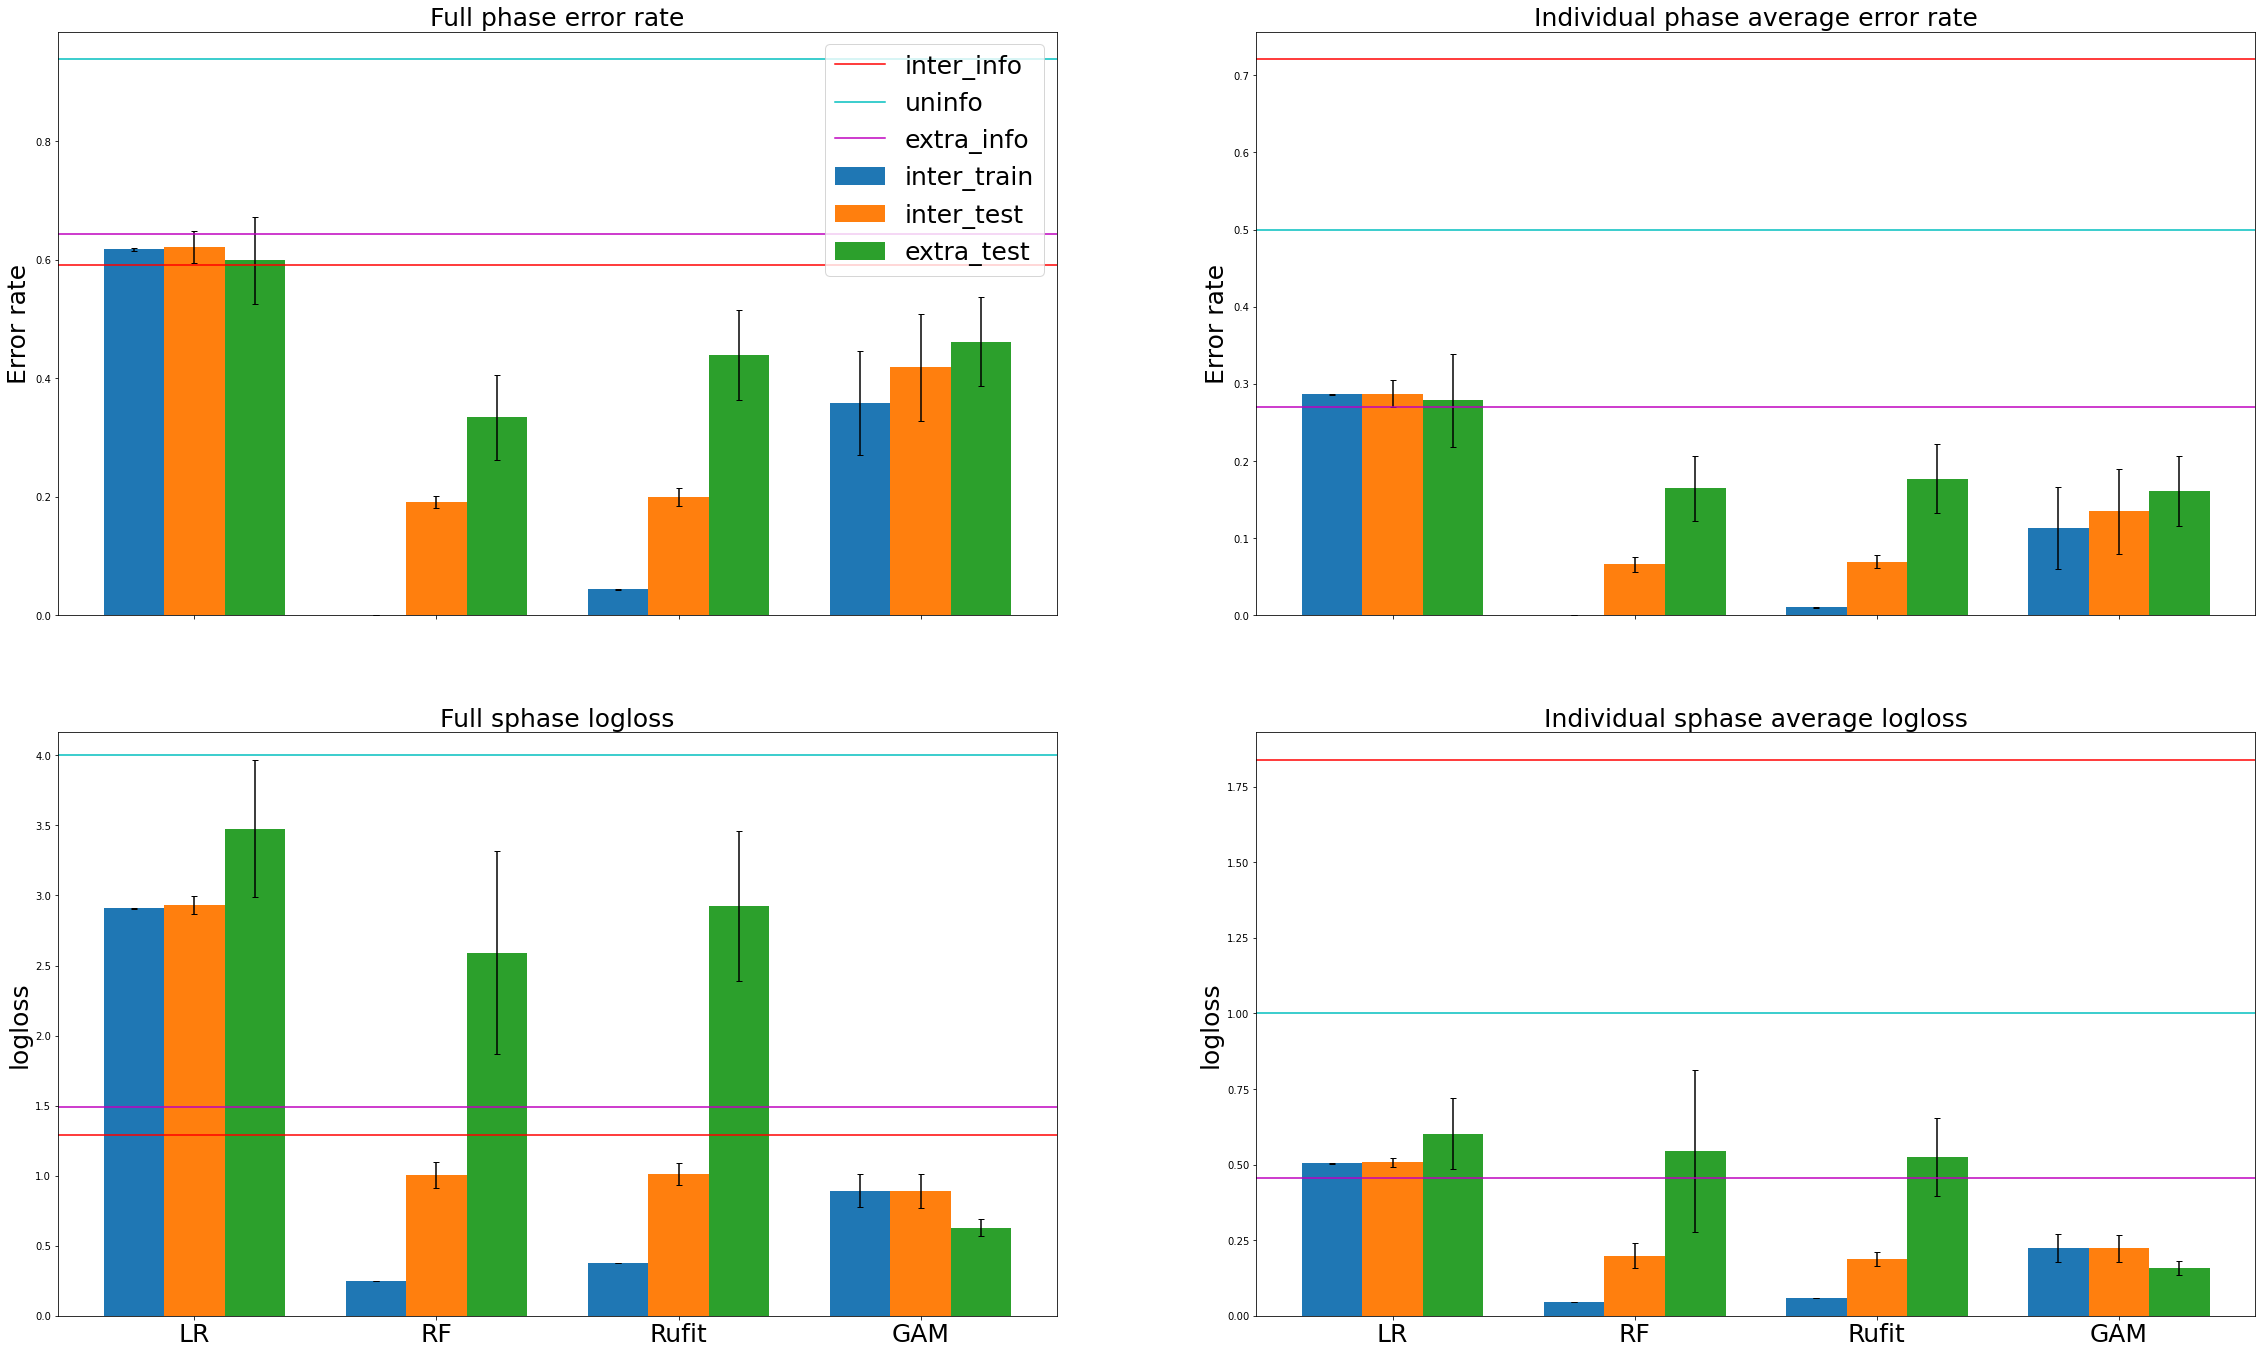

In [22]:
colors = ['r', 'c', 'm', 'y']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=False, sharex=True)
fig.set_size_inches(cm2inch(100, 60))

width = 0.25
fontsize = 25
ind = np.arange(len(df_extrafull))
ax1.bar(ind-width, df_interfull[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_error']/30**0.5, capsize=3.0)
ax1.bar(ind, df_interfull[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_error']/30**0.5, capsize=3.0)
ax1.bar(ind+width, df_extrafull[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_error']/30**0.5, capsize=3.0)

# add base line
inter_error_base = [inter_full_info_error, inter_full_uinfo_error, extra_full_info_error]
inter_error_name = ['inter_info', 'uninfo', 'extra_info']
for i in range(len(inter_error_base)):
    ax1.axhline(y=inter_error_base[i], color=colors[i], linestyle='-', label=inter_error_name[i])

ax1.set_title('Full phase error rate', fontsize=fontsize)
ax1.set_xticks(ind)
ax1.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax1.set_ylabel('Error rate', fontsize=fontsize)
ax1.legend(fontsize=fontsize)


ax2.bar(ind-width, df_inter_average[f'mean_train_error'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_error']/30**0.5, capsize=3.0)
ax2.bar(ind, df_inter_average[f'mean_test_error'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_error']/30**0.5, capsize=3.0)
ax2.bar(ind+width, df_extra_average[f'mean_test_error'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_error']/30**0.5, capsize=3.0)

ax2.set_title('Individual phase average error rate', fontsize=fontsize)
ax2.set_xticks(ind)
ax2.set_ylabel('Error rate', fontsize=fontsize)
ax2.set_xticklabels(df_extrafull.index, fontsize=fontsize)

# add base line
avg_error_base = [inter_avg_info_error, inter_avg_uninfo_error, extra_avg_info_error]
avg_error_name = ['inter_info', 'uninfo', 'extra_info']
for i in range(len(avg_error_base)):
    ax2.axhline(y=avg_error_base[i], color=colors[i], linestyle='-', label=avg_error_name[i])



ax3.bar(ind-width, df_interfull[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_interfull[f'std_train_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind, df_interfull[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_interfull[f'std_test_log loss']/30**0.5, capsize=3.0)
ax3.bar(ind+width, df_extrafull[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extrafull[f'std_test_log loss']/30**0.5, capsize=3.0)

full_loss_base = [inter_full_info_loss, inter_full_uninfo_loss, extra_full_info_loss]
full_loss_name = ['inter_info', 'uninfo', 'extra_info']
for i in range(len(full_loss_base)):
    ax3.axhline(y=full_loss_base[i], color=colors[i], linestyle='-', label=full_loss_name[i])

ax3.set_title('Full sphase logloss', fontsize=fontsize)
ax3.set_xticks(ind)
ax3.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax3.set_ylabel('logloss', fontsize=fontsize)


ax4.bar(ind-width, df_inter_average[f'mean_train_log loss'], width=width, label='inter_train', 
        yerr=df_inter_average[f'std_train_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind, df_inter_average[f'mean_test_log loss'], width=width, label='inter_test',
        yerr=df_inter_average[f'std_test_log loss']/30**0.5, capsize=3.0)
ax4.bar(ind+width, df_extra_average[f'mean_test_log loss'], width=width, label='extra_test',
        yerr=df_extra_average[f'std_test_log loss']/30**0.5, capsize=3.0)

avg_loss_base = [inter_avg_info_loss, inter_avg_uninfo_loss, extra_avg_info_loss]
avg_loss_name = ['inter_info', 'uninfo', 'extra_info']
for i in range(len(avg_loss_base)):
    ax4.axhline(y=avg_loss_base[i], color=colors[i], linestyle='-', label=avg_loss_name[i])

ax4.set_title('Individual sphase average logloss', fontsize=fontsize)
ax4.set_xticks(ind)
ax4.set_xticklabels(df_extrafull.index, fontsize=fontsize)
ax4.set_ylabel('logloss', fontsize=fontsize)

plt.show()

### Conclusion

1. Full sphase is harder to predict as the uncertainty and error rate are relatively high than individual sphase prediction
2. GAM model performance really stable for extrapolation, it captures some relationship and can reach the lowest logloss.
3. Ramdom Forest and Rufit are the best two models if we only consider the interpolation. For the extrapolation, we prefer GAM model.